# Exercise Sheet No. 1

---

> Machine Learning for Natural Sciences, Summer 2022, Jun.-Prof. Pascal Friederich, pascal.friederich@kit.edu
> 
> Deadline: 25.04.2022, 8am

---

**Topic**: This exercise sheet will not be graded and serves as an introduction to explain the online exercise regulations and to help you to familiarize yourself with Python, Jupyter and numpy. The exercises in this sheet are meant as an appetizer to show you what future exercises could cover. 

## Preliminaries
If you are not familiar with Python, you may want to learn more about Python and its basic syntax. Since there are a lof of free and well written tutorials online, we refer you to one of the following online tutorials:

* http://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook
* https://www.learnpython.org/
* https://www.w3schools.com/python/
* https://automatetheboringstuff.com/

## 1.1 Corona (not graded)

*Disclaimer*: If you are in any way personnally affected by the Corona crisis, you do not have to participate in this exercise. It will not be graded or is necessary for the progress of this course. 

To get to know Python's data science workflows, we briefly analyze the current corona epidemic. First download a historical dataset on the corona infections worldwide from the European Centre for Disease Prevention and Control in 2020 ([link](https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx)). We can do this in Python via the ``requests`` package. 

In [151]:
import os

import requests

data_url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"
data_file = "COVID-19-geographic-disbtribution-worldwide.xlsx"
if not os.path.exists(data_file):
    print("Downloading dataset ...")
    with open(data_file, "wb") as f:
        f.write(requests.get(data_url).content)
    print("Downloading dataset done.")

Now, we load the dataset via the data library ``pandas``, which will return a ``DataFrame`` object. We print the head of the table with ``.head()``:

In [152]:
import pandas as pd
import numpy as np

corona_world = pd.read_excel(data_file)
corona_world.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


The ``DataFrame`` allows access via index and columns. Basic Python operators ``[]`` and ``.`` are supported. (Warning) Whether a copy or a reference is returned for a setting operation, may depend on the context.

In [153]:
print(corona_world.index)
print(corona_world.columns)

RangeIndex(start=0, stop=61900, step=1)
Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')


Now we will select a column, namely ``corona_world['countriesAndTerritories']`` and then select the indices where we find ``"Germany"`` via ``corona_countries=='Germany'`` not by numbers but by a boolean array. We can also do multi-indexing via a list ``[["dateRep", "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"]]``. The values for the sub-frame ``corona_germany`` is obtained by either ``.values`` or ``.to_numpy``. Note that usually you will use a pandas ``DataFrame`` by the operators ``.iloc`` and ``.loc`` for index- and name-wise access of a group of rows and columns. They furthermore enable slicing. For convenience we flip the final data so that they start from the past going forward.

In [154]:
# Select data
corona_countries = corona_world['countriesAndTerritories']
corona_germany = corona_world[corona_countries == 'Germany']
corona_germany = corona_germany[["dateRep", "cases",
                                 "deaths", "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"]]
time_germany = corona_germany["dateRep"].values
cc_germany = corona_germany["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"].to_numpy()
time_germany = np.flip(time_germany)
cc_germany = np.flip(cc_germany)

To visualize the data, we examplary plot the number of 14 days cumulative cases as a function of time for Germany. For this purpose we use ``matplotlib.pyplot`` plotting tool. You can find a nice user guide with examples [here](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py). We will use ``matplotlib`` very often in the next exercises.

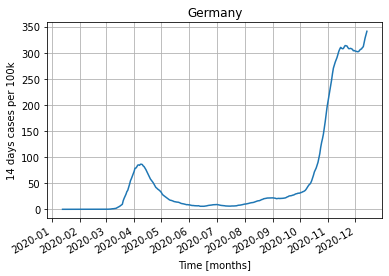

In [155]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Date functionality
months = mdates.MonthLocator()  # every month
# Make plot
fig, ax = plt.subplots()  # generate a new plot
ax.plot(time_germany, cc_germany)  # plot data
ax.xaxis.set_major_locator(months)  # modify axis
fig.autofmt_xdate()
plt.grid(True, 'both')
plt.title("Germany")
plt.ylabel('14 days cases per 100k')
plt.xlabel('Time [months]')
plt.show()  # make plot

Now its time for you to answer the following questions, while using either pandas dataframes or convert to numpy and Python objects. Note: Looping through large Python lists can be very slow as Python is an interpreted programming language, which is why, typically built-in functionality of ``numpy`` and ``pandas`` is preferred. Have a look at the documentation of [numpy](https://numpy.org/doc/) and [pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started), if you want to know more. We will work with [numpy](https://numpy.org/doc/) methods in the next exercises in more detail.

**1.1.1** List the number of the deceased in connection with Covid 19 relative to the population for each country for 2020. What can you say about the mortality rate? Which country has the highest and which has the lowest mortality rate? To do this you first have to obtain the information of population per country for example in a python ``dict``. You may want to use the following pandas methods (if you dont know them, look them up at [pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)): ``.unique``, ``.groupby``, ``.mean``, ``.sum``, ``.sort_values``, ``.get_group`` and ``.from_dict``:

In [156]:
countries = []
population = {}
deaths = {}
rel_deaths = {}
country_max_mortality = ""
# YOUR CODE HERE
countries = pd.unique(corona_world['countriesAndTerritories'])
corona_countries = corona_world['countriesAndTerritories']

for country in countries:
    country_data = corona_world[corona_countries == country]
    deaths[country] = country_data["deaths"].sum()
    population[country] = country_data["popData2019"].max()
    
    rel_deaths[country] = deaths[country]/population[country]
    
rel_deaths_df = pd.DataFrame.from_dict(rel_deaths, orient='index', columns=['A'])
country_max_mortality = rel_deaths_df.sort_values(by=['A'], ascending=False).index[0]

**1.1.2** Plot the cumulative number of cases, deceased and number of recoverd patients for Germany. Make sure that the data has the correct order for a cummulative sum. You can either again write your own function or simply use ``np.cumsum`` to compute the cumulative sum of the number of cases and deaths in Germany.

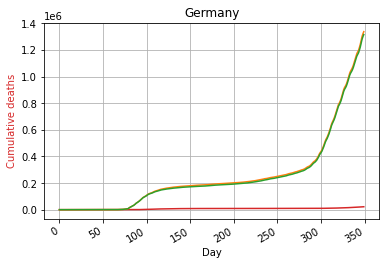

In [157]:
cum_death = np.array([])
cum_cases = np.array([])
# YOUR CODE HERE
germany_data = corona_world[corona_countries == 'Germany']
germany_data_sorted = germany_data.sort_values(by=['dateRep'])
germany_death_and_cases_per_day = germany_data_sorted[['deaths', 'cases']]
cum_death_and_cases = np.cumsum(germany_death_and_cases_per_day)
cum_death = np.array(cum_death_and_cases['deaths'].tolist())
cum_cases = np.array(cum_death_and_cases['cases'].tolist())

cum_recovered = np.subtract(cum_cases, cum_death)

# Date functionality
months = mdates.MonthLocator()  # every month
# Make plot
fig, ax1 = plt.subplots()  # generate a new plot
ax1.set_xlabel('Day')
color="tab:red"
ax1.set_ylabel('Cumulative deaths', color=color)
ax1.plot(cum_death, color=color)  # plot data
color="tab:orange"
ax1.plot(cum_cases, color=color)  # plot data
color="tab:green"
ax1.plot(cum_recovered, color=color)  # plot data

#ax2 = ax1.twinx()  # generate a new plot
#ax2.set_xlabel('Day')
#color="tab:orange"
#ax2.set_ylabel('Cumulative cases', color=color)
#ax2.plot(cum_cases, color=color)  # plot data

#ax3 = ax1.twinx()  # generate a new plot
#ax3.set_xlabel('Day')
#color="tab:green"
#ax3.set_ylabel('Cumulative recovered', color=color)
#ax3.plot(cum_recovered, color=color)  # plot data

fig.autofmt_xdate()
plt.grid(True, 'both')
plt.title("Germany")
plt.show()  # make plot

There has been a discussion in Germany whether the 'second wave' of infections in the end of 2020 was underestimated by many political leaders. The chancellor of Germany, Angela Merkel and her team, warned the ministers and the public of a dire development in the beginning of october. In fact, the large increase of infections before christmas turned out to be very serious, even with counter-measures. We want to see in the next task, if we can correctly predict the development.

**1.1.3** First we select the data from the plot above between 01.08.2020 and 01.10.2020. Note that we are using numpy arrays with number type ``dtype='datetime64[ns]'``. We can use the package ``datetime`` and its class ``datetime`` for human-readable dates, that can be freely converted into strings, seconds or via ``np.datetime64()`` into numpy's ``dtype='datetime64[ns]'``. We have to select the correct time-period and divide by the delta of ``np.timedelta64(1,'D')`` that corresponds to one day. Finally we end up with an array counting the days with from 01.08.2020 onwards.

In [158]:
# Select dates
from datetime import datetime

date_start = datetime(2020, 8, 1)
date_stop = datetime(2020, 10, 1)
selection = np.logical_and(time_germany >= np.datetime64(date_start),
                           time_germany < np.datetime64(date_stop))

# Select training data
x_cases = np.array(time_germany[selection] - np.datetime64(date_start)) / np.timedelta64(1, 'D')
y_cases = np.array(cc_germany)[selection]
x_test = time_germany[time_germany >= np.datetime64(date_start)]
x_test_days = (x_test - np.datetime64(date_start)) / np.timedelta64(1, 'D')

Try to fit the data with analytical expressions using for example ``scipy.optimize.curve_fit``. If the fit does not work, try setting bounds and initial guesses. Try the following relations, with some initial guess for the free parameters $(a,b,\dots)$. First implement the functions in python with the help of ``numpy`` or ``scipy`` methods like: ``np.square``, ``np.exp``, ``np.power``.

* $f_1(x)= ax+b$
* $f_2(x)= c e^{a (x-b)}$
* $f_3(x)= a x^2 + b x + c$
* $f_4(x)= a x^3 + b x^2 + cx + d$
* $\dots$

In [159]:
# Implement functions.
def fun_1(x, a, b):
    return a * x + b


def fun_2(x, a, b, c):
    return c * np.exp(a*(x-b))


def fun_3(x, a, b, c):
    return a*np.square(x) + b*x +c


def fun_4(x, a, b, c, d):
    return a*np.power(x, 3)+b*np.square(x)+c*x+d


# Try your own function if you want


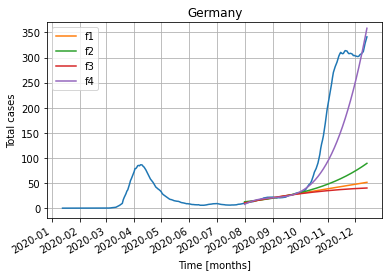

In [160]:
import scipy.optimize
import datetime

param_1, _ = scipy.optimize.curve_fit(fun_1, x_cases, y_cases, p0 = [100,200])
param_2, _ = scipy.optimize.curve_fit(fun_2, x_cases, y_cases, p0 = [1,2,3])
param_3, _ = scipy.optimize.curve_fit(fun_3, x_cases, y_cases, p0 = [1,2,3])
param_4, _ = scipy.optimize.curve_fit(fun_4, x_cases, y_cases, bounds = ([-10,-10,-np.inf,-np.inf], [10,10,np.inf,np.inf]))
y_fit_1 = fun_1(x_test_days, *param_1)
y_fit_2 = fun_2(x_test_days, *param_2)
y_fit_3 = fun_3(x_test_days, *param_3)
y_fit_4 = fun_4(x_test_days, *param_4)

fig, ax = plt.subplots()  # generate a new plot
ax.plot(time_germany, cc_germany)  # plot data
ax.plot(x_test, y_fit_1, label="f1")  # plot data
ax.plot(x_test, y_fit_2, label="f2")  # plot data
ax.plot(x_test, y_fit_3, label="f3")  # plot data
ax.plot(x_test, y_fit_4, label="f4")  # plot data
ax.xaxis.set_major_locator(months)  # modify axis
#ax.set_xlim([datetime.date(2020, 9, 1), datetime.date(2020, 11, 1)])
fig.autofmt_xdate()
plt.grid(True, 'both')
plt.ylim([-20, 370])
#plt.ylim([20, 100])
plt.legend()
plt.title("Germany")
plt.ylabel('Total cases')
plt.xlabel('Time [months]')
plt.show()  # make plot

Which function extrapolates best to the subsequent development starting from 01.10.2020 to the end of the year? Can you quantify? Does this change if you only fit to the last 14 days from 17.09.2020 to the 01.10.2020? Which is the best function for 14 days extrapolation. Can you explain?

In [161]:
answer_best_fun = 4  # number of best function (int)
answer_change_14_days = True  # Does it change, answer with 'True' or 'False' (bool)
answer_best_fun_14_days = 3  # best function within 14 days fit (int)
answer_explanation = "It changes because of "  # Answer as string in free text.

**1.1.4** Finally, let us also try some machine learning to fit the data. You don't need to understand the code in detail, yet. We fit a small Neural network on the time series prediction. We will have the neural network train on 14 previous days to predict the change of infections for the next day in the time periode between 01.08.2020 and 01.10.2020. And then to predict the next days from 01.10.2020 onward. This is by far not a sophisticated model. We will learn more methods in the lectures.

In [162]:

from sklearn.neural_network import MLPRegressor

# Prepare and run training
step_size = 14
x_train = np.array([y_cases[i:i + step_size] for i in range(len(x_cases) - step_size)])
y_train = np.array([y_cases[step_size + i] - y_cases[step_size + i - 1] for i in range(len(x_cases) - step_size)])
nn = MLPRegressor(hidden_layer_sizes=(100, 100), random_state=1, max_iter=500).fit(x_train, y_train)

# Predict the time-series
y_test = y_cases[-step_size:]
y_val = y_cases[:step_size]
days_to_predict = 30
for _ in range(days_to_predict):
    next_step = nn.predict(np.expand_dims(y_test[-step_size:], axis=0)) + y_test[-1]
    y_test = np.concatenate([y_test, next_step], axis=0)
    next_step = nn.predict(np.expand_dims(y_val[-step_size:], axis=0)) + y_val[-1]
    y_val = np.concatenate([y_val, next_step], axis=0)

# Make time values for y_val and y_test
x_test = np.arange(-step_size, days_to_predict) * np.timedelta64(1, 'D') + np.datetime64(date_stop)
x_val = np.arange(0, days_to_predict + step_size) * np.timedelta64(1, 'D') + np.datetime64(date_start)

Plot the corona infections and evaluate the predictions for ``x_test``, ``x_val`` and ``y_test``, ``y_val`` with the ground truth. You can play around with the hyperparameters (parameters not optimized in training but used to control the learning process) and see how the result changes. What are problems and how would you improve the Machine Learning model?

In [163]:
answer_nn = ""

In [164]:
# Tests for auto-grading (check variables to be graded).
assert isinstance(countries, list) or isinstance(countries, np.ndarray)
assert isinstance(rel_deaths, dict)
assert isinstance(population, dict)
assert isinstance(deaths, dict)
assert isinstance(country_max_mortality, str)

In [165]:
assert isinstance(cum_death, np.ndarray)
assert isinstance(cum_cases, np.ndarray)

In [166]:
assert fun_1(0, 0, 0) == 0
assert fun_2(0, 0, 0, 0) == 0
assert fun_3(0, 0, 0, 0) == 0
assert fun_4(0, 0, 0, 0, 0) == 0

In [167]:
assert param_1 is not None
assert param_2 is not None
assert param_3 is not None
assert param_4 is not None
assert isinstance(answer_best_fun, int)
assert isinstance(answer_change_14_days, bool)
assert isinstance(answer_best_fun_14_days, int)
assert isinstance(answer_explanation, str)

In [168]:
assert isinstance(answer_nn, str)

## 1.2 Snake Game (not graded)

In this exercise you will implement the retro game [Snake](https://en.wikipedia.org/wiki/Snake_(video_game_genre)) to learn Python. There are already many tutorials and possible ways to do this on the web. You can consult [https://www.edureka.co/blog/snake-game-with-pygame/](https://www.edureka.co/blog/snake-game-with-pygame/) or [https://pythonspot.com/snake-with-pygame/](https://pythonspot.com/snake-with-pygame/) if you get stuck. For this implementation, we need ``pygame``. If you did not install the package in the preliminaries above, you have to do it now. Start with this backbone. You have to implement the functions ``generate_food_position``, ``move_snake``, ``check_crash_walls`` and ``check_crash_self`` yourself to do the following tasks.Note that you have to take care of limiting the length in the move of the snake.

* Game Over when snake hits the boundaries.
* Adding the food: Snake can eat randomly spawning pixels.
* Increasing the length of the snake.
* Displaying the Score at the end.

How does this relate to Machine learning? Reinforcement learning [(RL)](https://en.wikipedia.org/wiki/Reinforcement_learning) is a field of machine learning that trains intelligent agents to choose actions in an environment in order to maximize a certain reward. Very often nerual networks are used by agents to choose the best action. Lots of methods and adavances in RL are tested with games. In this case, an AI is to be trained to play the game targeted to achieve the highest score/ the longest snake before crashing. 

In [169]:
import pygame
import random

# Some global parameters to define color, sizes etc.
white = (255, 255, 255)
yellow = (255, 255, 102)
black = (0, 0, 0)
red = (213, 50, 80)
green = (0, 255, 0)
blue = (50, 153, 213)
dis_width = 600
dis_height = 400
snake_block = 10  # size of a snake segment
snake_speed = 15  # speed


def Your_score(score):
    """Print the score on screen."""
    score_font = pygame.font.SysFont("comicsansms", 15)
    value = score_font.render("Your Score: " + str(score), True, yellow)
    dis.blit(value, [0, 0])


def message(msg, color):
    font_style = pygame.font.SysFont("bahnschrift", 25)
    mesg = font_style.render(msg, True, color)
    dis.blit(mesg, [dis_width / 6, dis_height / 3])


def draw_our_snake(snake_block, snake_list):
    """Draw the snake."""
    for x in snake_list:
        pygame.draw.rect(dis, black, [x[0], x[1], snake_block, snake_block])


def generate_food_position():
    """Make random food position."""
    # @TODO: Make random position
    foodx = round(random.randrange(0, dis_width - snake_block) / 10.0) * 10.0
    foody = round(random.randrange(0, dis_height - snake_block) / 10.0) * 10.0
    return [foodx, foody]


def move_snake(snake_List, snake_Head, Length_of_snake, do_append=True):
    """Move the snake with new head"""
    if do_append:
        snake_List.append(snake_Head)
    # @TODO: Limit the snake list to fix length
    if len(snake_List) > Length_of_snake:
        del snake_List[0]
    


def check_crash_walls(x1, y1):
    """Check if it hits the wall"""
    crash_detect = False
    # @TODO: Check Wall collision
    if x1 < 0 or x1 > dis_width or y1 < 0 or y1 > dis_height:
        crash_detect = True
    
    return crash_detect


def check_crash_self(snake_List, snake_Head):
    """Check if snake crashed in itself."""
    found_crash = False
    # @TODO: Check Self collision
    for x in snake_List[:-1]:
        if snake_Head[0] == x[0] and snake_Head[1] == x[1]:
            found_crash = True
    
    return found_crash


def gameLoop():
    game_over = False
    game_close = False

    x1 = dis_width / 2
    y1 = dis_height / 2

    x1_change = 0
    y1_change = 0

    snake_List = []  # list of coordinates [[x1, y1], [x1, y1], ...]
    Length_of_snake = 1

    foodx, foody = generate_food_position()

    while not game_over:

        while game_close == True:
            dis.fill(blue)
            message("You Lost! Press C-Play Again or Q-Quit", red)
            Your_score(Length_of_snake - 1)
            pygame.display.update()

            for event in pygame.event.get():
                if event.type == pygame.KEYDOWN:
                    if event.key == pygame.K_q:
                        game_over = True
                        game_close = False
                    if event.key == pygame.K_c:
                        gameLoop()

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                game_over = True
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_LEFT and x1_change != snake_block:
                    x1_change = -snake_block
                    y1_change = 0
                elif event.key == pygame.K_RIGHT and x1_change != -snake_block:
                    x1_change = snake_block
                    y1_change = 0
                elif event.key == pygame.K_UP and y1_change != snake_block:
                    y1_change = -snake_block
                    x1_change = 0
                elif event.key == pygame.K_DOWN and y1_change != -snake_block:
                    y1_change = snake_block
                    x1_change = 0

        if check_crash_walls(x1, y1):
            game_close = True
        x1 += x1_change
        y1 += y1_change

        dis.fill(blue)
        pygame.draw.rect(dis, green, [foodx, foody, snake_block, snake_block])

        snake_Head = [x1, y1]
        move_snake(snake_List, snake_Head, Length_of_snake)

        if check_crash_self(snake_List, snake_Head):
            game_close = True

        draw_our_snake(snake_block, snake_List)
        Your_score(Length_of_snake - 1)

        pygame.display.update()

        if x1 == foodx and y1 == foody:
            foodx, foody = generate_food_position()
            Length_of_snake += 1

        clock.tick(snake_speed)

    pygame.quit()
    # quit()


Add the tasks to the game and have fun playing :) To test your implementation set ``run_game = True`` and execute cell.

In [170]:
run_game = False  # please submit you answer with run_game = False
if run_game:
    pygame.init()
    dis = pygame.display.set_mode((dis_width, dis_height))
    pygame.display.set_caption('Snake Game')
    clock = pygame.time.Clock()
    gameLoop()